In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.extra import anomaly_clf
import warnings

warnings.filterwarnings('ignore')


In [3]:
import ast
import os
from src.extra import calc_distances
from src.extra import create_csv

# Each csv file contains 21 features, namely X and Y coords of predicted hand keypoint
# Approximately 300 samples for each csv file
# Iterate through all CSV files with raw keypoints and then
# Create a new CSV file for each sign with calculated distances
columns = ["dist_20_0", "dist_16_0", "dist_12_0", "dist_8_0", "dist_4_0",
            "dist_20_16", "dist_16_12", "dist_12_8", "dist_8_4"]
path = r"data\data_keypoints"

for file in os.listdir(path):
    distances = []
    df = pd.read_csv(os.path.join(path, file))
    for i, row in df.iterrows():
        numpy_row = row.to_numpy()
        numpy_row = np.array([ast.literal_eval(item) for item in numpy_row])
        dist = calc_distances(numpy_row)
        distances.append(dist)
        
    create_csv(distances, columns=columns, output=r"data/dist_data/" + file[0] + "_dist.csv")
        

In [5]:
# Using Isolation Forest algorithm with outliers fraction=0.3, get rid off of incorrect distances
# and add label column
dist_path = r"data/dist_data"
data = pd.DataFrame()
for label, file in enumerate(os.listdir(dist_path)):
    df = pd.read_csv(os.path.join(dist_path, file))
    data = data.append(anomaly_clf(df, label=label, outliers_fraction=0.4))
    
data.head(2)

,dist_20_0,dist_16_0,dist_12_0,dist_8_0,dist_4_0,dist_20_16,dist_16_12,dist_12_8,dist_8_4,label
0,49.024784,31.035207,49.443554,110.101010,129.158331,26.182262,26.409017,61.235759,19.586999,0
2,48.290193,35.370848,49.501759,99.344606,136.790507,27.421204,25.415429,50.800759,37.518808,0


In [6]:
data.reset_index(inplace=True, drop=True)

In [7]:
data

,dist_20_0,dist_16_0,dist_12_0,dist_8_0,dist_4_0,dist_20_16,dist_16_12,dist_12_8,dist_8_4,label
0,49.024784,31.035207,49.443554,110.101010,129.158331,26.182262,26.409017,61.235759,19.586999,0
1,48.290193,35.370848,49.501759,99.344606,136.790507,27.421204,25.415429,50.800759,37.518808,0
2,50.664792,42.412037,56.252180,121.066225,136.802089,27.056595,21.351022,66.157718,18.688935,0
3,62.128068,51.626757,69.487509,110.456872,166.666018,21.671073,22.792934,42.155715,56.255131,0
4,55.756668,40.384440,49.296863,103.819132,156.374861,24.334537,20.205176,55.207995,52.652940,0
...,...,...,...,...,...,...,...,...,...,...
4394,179.181235,42.765284,52.525154,79.894573,157.572829,137.072747,22.761293,29.096736,91.539737,23
4395,161.995430,40.754767,46.570676,70.616096,139.248209,125.470419,14.738152,26.990024,76.703777,23
4396,164.749568,48.148963,53.680982,77.502896,140.443460,118.276138,19.204475,26.704825,75.949258,23
4397,170.304454,46.646010,46.584863,78.367235,146.164721,126.811375,14.909768,32.810842,83.228421,23


# Before and After using IsolationForest

## A

In [8]:
data_A = pd.read_csv(r"data/dist_data/A_dist.csv")
data_B = pd.read_csv(r"data/dist_data/B_dist.csv")
data_C = pd.read_csv(r"data/dist_data/C_dist.csv")
data_D = pd.read_csv(r"data/dist_data/D_dist.csv")
data_E = pd.read_csv(r"data/dist_data/E_dist.csv")

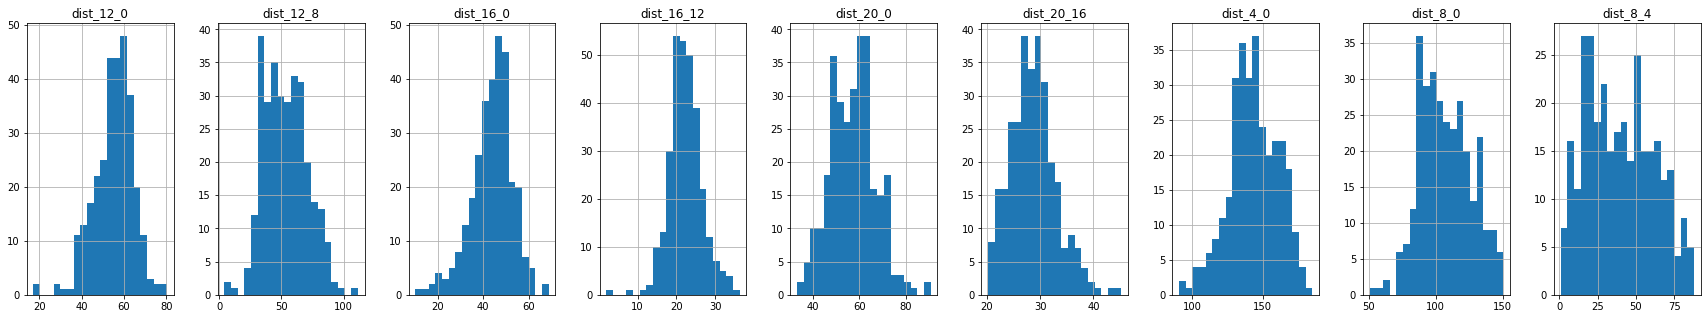

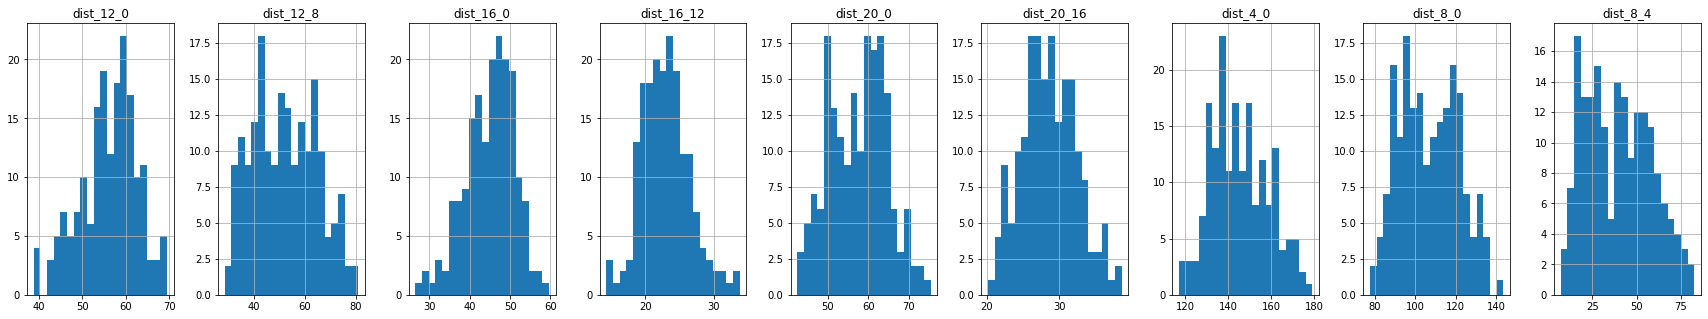

In [12]:
_A = data_A.hist(bins=20, figsize=(30, 5), layout=(1, 9))
_A_pr = data[data.label == 0].loc[:, :'dist_8_4'].hist(bins=20, figsize=(30, 5), layout=(1, 9))

## B

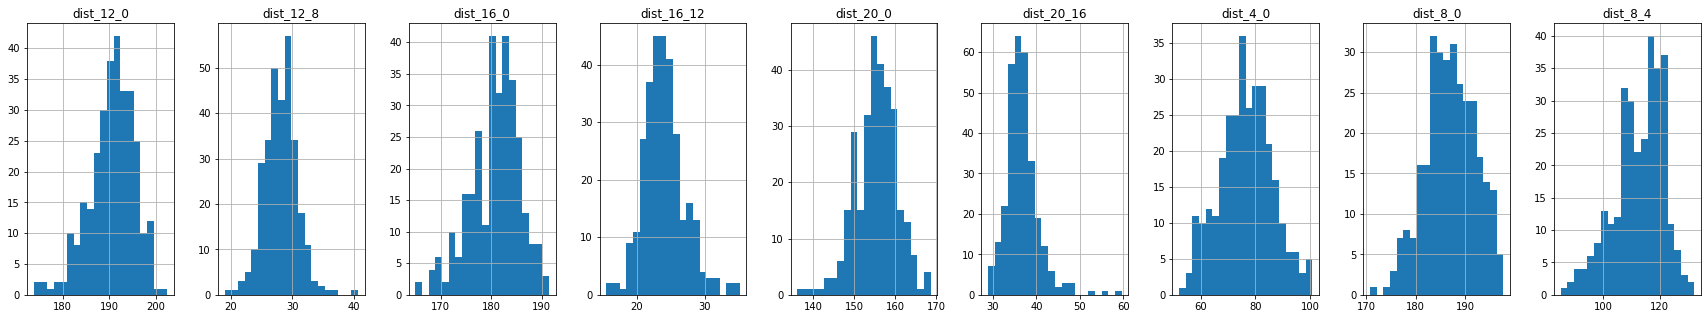

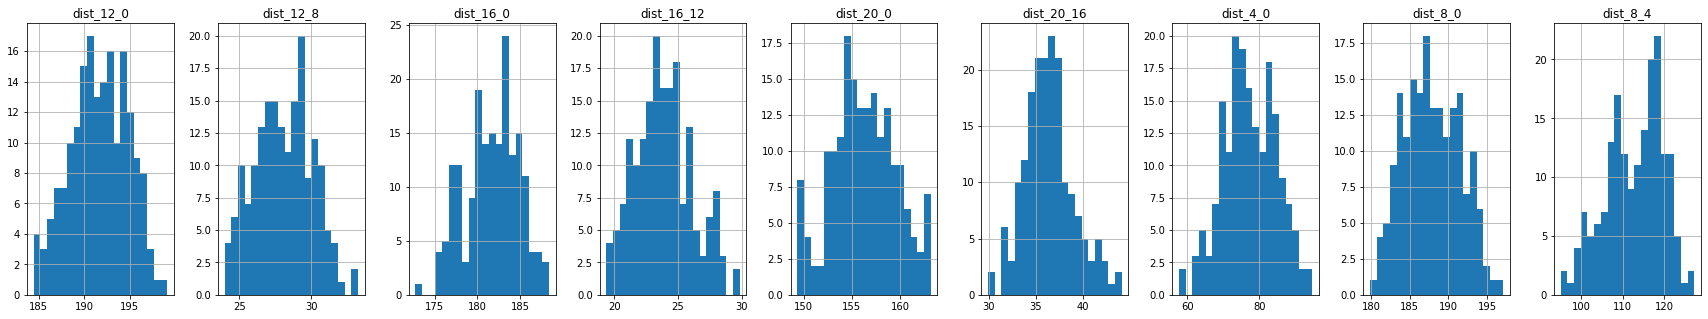

In [13]:
_B = data_B.hist(bins=20, figsize=(30, 5), layout=(1, 9))
_B_pr = data[data.label == 1].loc[:, :'dist_8_4'].hist(bins=20, figsize=(30, 5), layout=(1, 9))

## C 

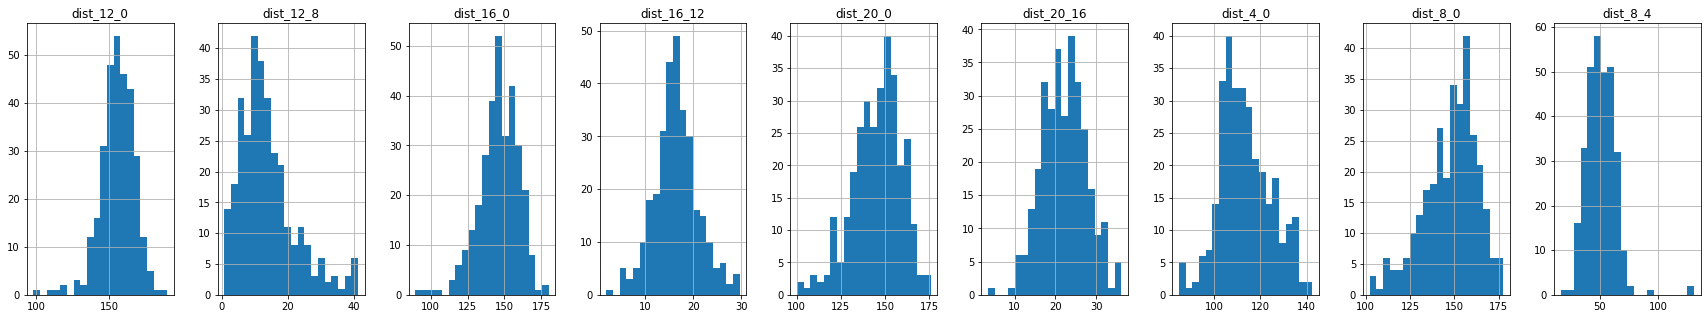

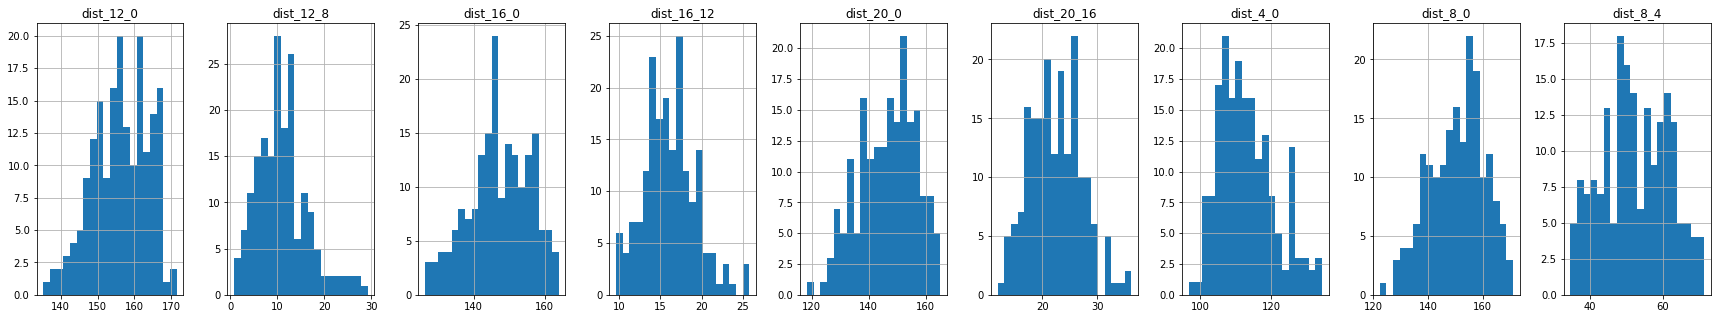

In [14]:
_C = data_C.hist(bins=20, figsize=(30, 5), layout=(1, 9))
_C_pr = data[data.label == 2].loc[:, :'dist_8_4'].hist(bins=20, figsize=(30, 5), layout=(1, 9))

## D

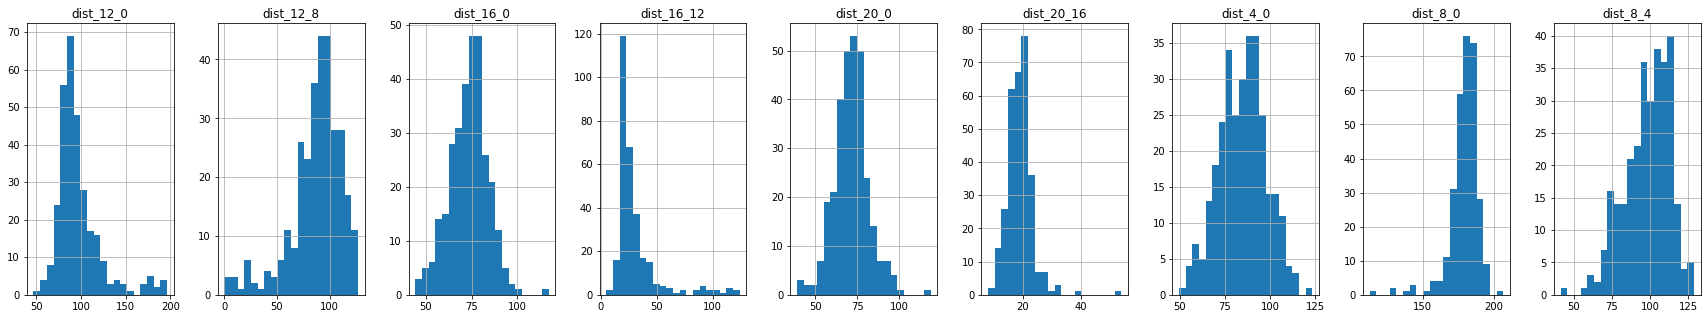

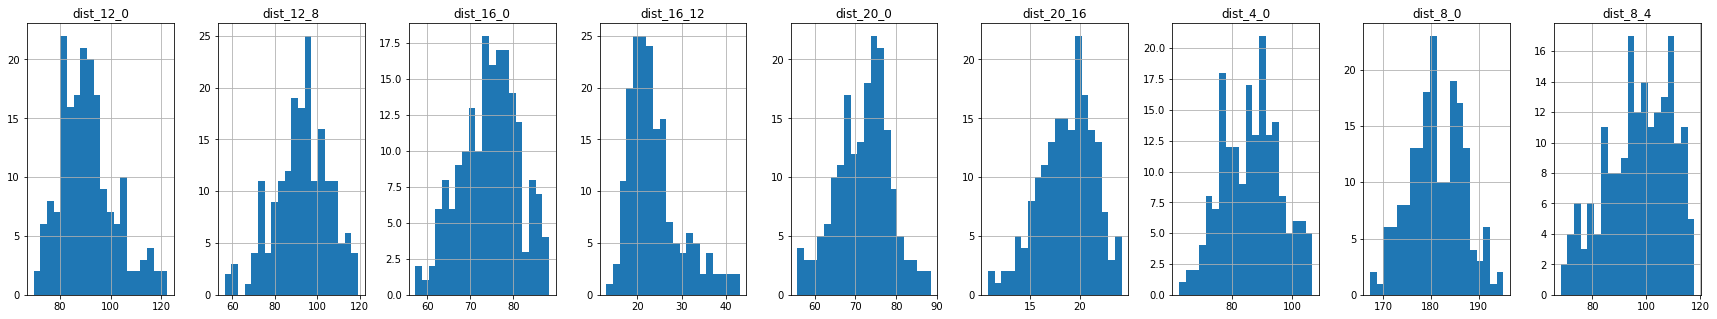

In [15]:
_D = data_D.hist(bins=20, figsize=(30, 5), layout=(1, 9))
_D_pr = data[data.label == 3].loc[:, :'dist_8_4'].hist(bins=20, figsize=(30, 5), layout=(1, 9))

## E

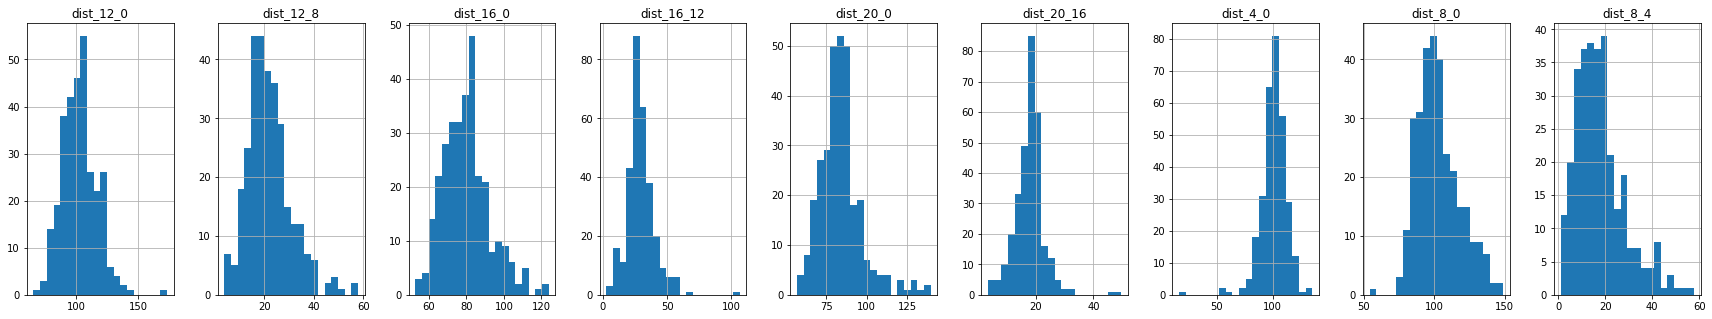

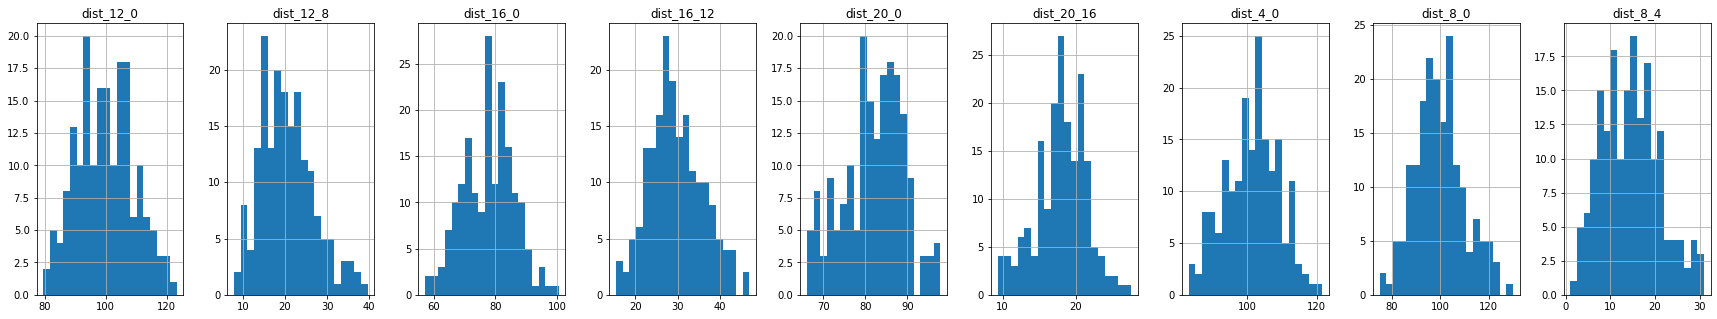

In [16]:
_E = data_E.hist(bins=20, figsize=(30, 5), layout=(1, 9))
_E_pr = data[data.label == 4].loc[:, :'dist_8_4'].hist(bins=20, figsize=(30, 5), layout=(1, 9))

In [18]:
data.to_csv(r'data\alphabet.csv', index=False)